In [1]:
import os
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_recall_fscore_support
from sklearn.preprocessing import LabelEncoder
from skimage.io import imread, imshow
from skimage.transform import resize
from PIL import Image
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

## Load + Preprocess Data

In [3]:
# uploading the unzipped file directly is painfully slow, so instead upload the zip file and unzip here
!unzip 'brain_tumor_15.zip' -d brain_tumor/

Streaming output truncated to the last 5000 lines.
  inflating: brain_tumor/brain_tumor_15/Germinoma/aa70a85904c26cc6f59cd24c3d78bc_big_gallery.JPG  
  inflating: brain_tumor/__MACOSX/brain_tumor_15/Germinoma/._aa70a85904c26cc6f59cd24c3d78bc_big_gallery.JPG  
  inflating: brain_tumor/brain_tumor_15/Germinoma/ddcd84da44fa28854346de661723a0_big_gallery.jpeg  
  inflating: brain_tumor/__MACOSX/brain_tumor_15/Germinoma/._ddcd84da44fa28854346de661723a0_big_gallery.jpeg  
  inflating: brain_tumor/brain_tumor_15/Germinoma/627c3dbebcc871c0ced48601590548_big_gallery.JPG  
  inflating: brain_tumor/__MACOSX/brain_tumor_15/Germinoma/._627c3dbebcc871c0ced48601590548_big_gallery.JPG  
  inflating: brain_tumor/brain_tumor_15/Germinoma/54271b343e576af02ea0cc41d41f4c_big_gallery.jpg  
  inflating: brain_tumor/__MACOSX/brain_tumor_15/Germinoma/._54271b343e576af02ea0cc41d41f4c_big_gallery.jpg  
  inflating: brain_tumor/brain_tumor_15/Germinoma/85b108250d37c6c5a0b6f084f9619e_big_gallery.JPG  
  inflating:

In [5]:
# Set the path to your image folder
image_folder = 'brain_tumor/brain_tumor_15'

# Define the image size and number of classes
img_size = (128, 128)

In [6]:
# Function to load and preprocess the images
def load_images(folder_path):
    images = []
    labels = []
    class_dirs = sorted(os.listdir(folder_path))

    for class_index, class_dir in enumerate(class_dirs):
        class_path = os.path.join(folder_path, class_dir)
        if os.path.isdir(class_path):
            image_files = os.listdir(class_path)
            for image_file in image_files:
                image_path = os.path.join(class_path, image_file)
                image = Image.open(image_path).convert('RGB')
                image = image.resize(img_size)
                image = np.array(image)
                images.append(image)
                labels.append(class_index -1)

    return np.array(images), np.array(labels)

In [7]:
# Load and preprocess the images
images, labels = load_images(image_folder)

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

In [8]:
# Flatten the image data into 1D array
x_train_flattened = x_train.reshape(x_train.shape[0], -1)
x_test_flattened = x_test.reshape(x_test.shape[0], -1)

## SVM

In [9]:
# Create and train the SVM model
svm_model = svm.SVC(kernel='linear')
svm_model.fit(x_train_flattened, y_train)

SVC(kernel='linear')

In [10]:
# Save the SVM model to a file
joblib.dump(svm_model, 'svm_model.pkl')

['svm_model.pkl']

## Model Evaluation

In [11]:
# Load the saved SVM model from file
svm_model = joblib.load('svm_model.pkl')

# Make predictions on the test set
y_pred = svm_model.predict(x_test_flattened)

In [12]:
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8656716417910447


In [13]:
# Calculate the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

print(confusion_mat)

[[ 81   0   1   0   0   1   0   0   6   1   3   0   1   0   0]
 [  0  60   0   0   0   0   0   2   8   5   2   1   0   0   0]
 [  1   0  30   0   0   0   0   1   3   1   0   0   0   0   0]
 [  0   0   0   5   0   0   0   0   0   0   0   0   0   0   0]
 [  1   0   0   0  18   0   0   0   3   0   1   0   0   0   1]
 [  3   0   0   0   0  39   0   0   4   0   0   0   0   0   0]
 [  0   0   0   0   0   0  12   0   2   0   0   0   1   1   0]
 [  1   0   0   0   0   0   0  26   0   0   0   0   0   2   0]
 [  5   4   2   0   0   1   0   0 135   7   4   2   0   2   0]
 [  3   0   1   0   0   1   0   0   3  81   1   0   0   0   0]
 [  0   3   0   0   0   1   0   0   1   2  81   2   0   0   0]
 [  0   0   0   0   0   1   0   0   1   1   0  40   0   0   0]
 [  1   0   1   0   0   0   1   0   0   0   0   2  34   0   0]
 [  0   0   0   0   0   0   0   0   3   0   1   0   1  84   0]
 [  0   1   0   0   0   0   0   0   0   0   0   0   0   1  28]]


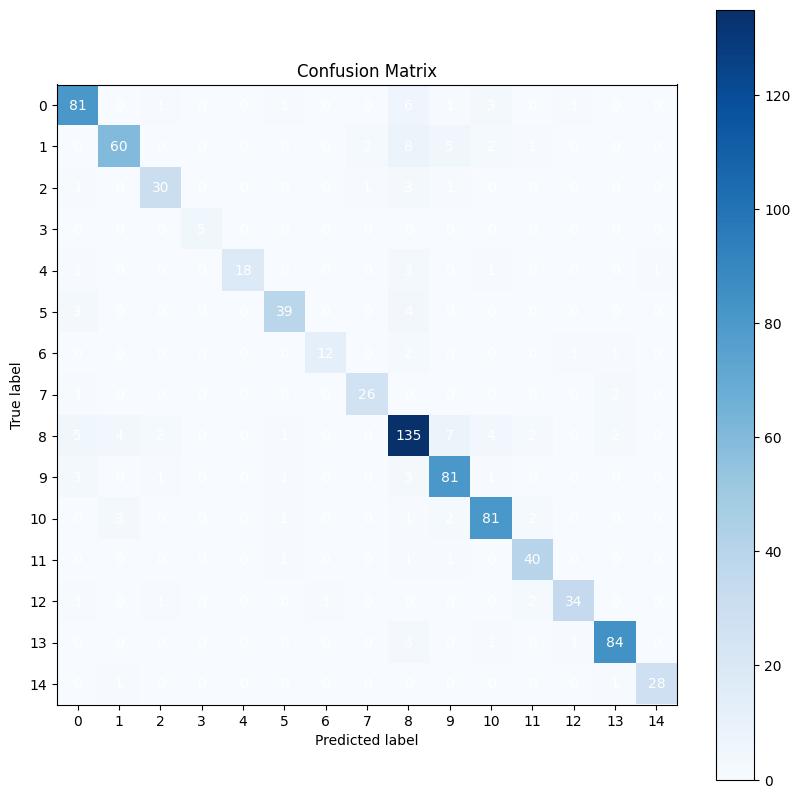

In [14]:
# Create the figure and axes objects
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the confusion matrix
im = ax.imshow(confusion_mat, interpolation='nearest', cmap=plt.cm.Blues)

# Add colorbar
cbar = ax.figure.colorbar(im, ax=ax)

# Set axis labels and title
ax.set(xticks=np.arange(confusion_mat.shape[1]),
       yticks=np.arange(confusion_mat.shape[0]),
       xlabel='Predicted label', ylabel='True label',
       title='Confusion Matrix')

# Loop over the data and annotate the plot with the count in each cell
for i in range(confusion_mat.shape[0]):
    for j in range(confusion_mat.shape[1]):
        ax.text(j, i, str(confusion_mat[i, j]),
                ha='center', va='center', color='white')

# Display the plot
plt.show()

In [15]:
# Calculate precision, recall, F1-score, and support for each class
precision, recall, f1_score, support = precision_recall_fscore_support(y_test, y_pred)

# Calculate the average F1 score
average_f1_score = np.mean(f1_score)

# Print the average F1 score
print("\nAverage F1 Score: {:.2f}".format(average_f1_score))


Average F1 Score: 0.88


## SVM Visualization

In [ ]:
# Visualize the SVM decision boundaries
def plot_decision_boundaries(model, X, y):
    # Define the meshgrid range
    h = 0.01  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Make predictions on the meshgrid points
    Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Reshape the predictions to match the meshgrid shape
    Z = Z.reshape(xx.shape)

    # Create a contour plot
    plt.contourf(xx, yy, Z, alpha=0.8)

    # Plot the training data points
    unique_classes = np.unique(y)
    for class_label in unique_classes:
        class_indices = np.where(y == class_label)
        plt.scatter(X[class_indices, 0], X[class_indices, 1], label=f"Class {class_label}")

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('SVM Decision Boundaries')
    plt.legend()
    plt.show()

# Flatten the first two principal components for visualization
x_train_pca = x_train_flattened[:, :2]

# Call the plot_decision_boundaries function
plot_decision_boundaries(svm_model, x_train_pca, y_train)

ValueError: ignored